In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("../data/train_sections_data.csv", encoding_errors='ignore')

In [5]:
df

,Text,IsBold,IsItalic,IsUnderlined,Left,Right,Top,Bottom,FontType,Label,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NOTES TO THE ACCOUNTS FOR THE 52 WEEK PERIOD E...,True,False,False,49.5,544.0,67.3,96.1,New Times Roman,1,NaN,NaN,NaN
1,DERIVATIVE INSTRUMENTS,False,False,False,41.5,140.2,49.0,54.7,New Times Roman,1,NaN,NaN,NaN
2,-6,False,False,False,113.5,122.2,409.3,414.9,New Times Roman,0,NaN,NaN,NaN
3,The following performance graph and related in...,False,False,False,112.9,706.9,339.0,360.3,New Times Roman,0,NaN,NaN,NaN
4,Typical service offerings include supply chain...,False,False,False,33.1,808.5,328.2,369.9,New Times Roman,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,The scheme's assets comprise a Friends Provide...,False,False,False,36.6,553.1,575.5,594.9,New Times Roman,0,NaN,NaN,NaN
14211,Transaction and Litigation Costs,False,True,True,42.7,151.4,91.0,96.7,New Times Roman,1,NaN,NaN,NaN
14212,The weighted-average fair value of options gra...,False,False,False,33.1,806.9,106.1,121.3,New Times Roman,0,NaN,NaN,NaN
14213,The analysis of gross contractual cash flow di...,False,False,False,42.6,553.1,667.0,687.0,New Times Roman,0,NaN,NaN,NaN


In [7]:
df = df.iloc[:, 0:10]

In [8]:
df = df.dropna()

<Axes: xlabel='Label'>

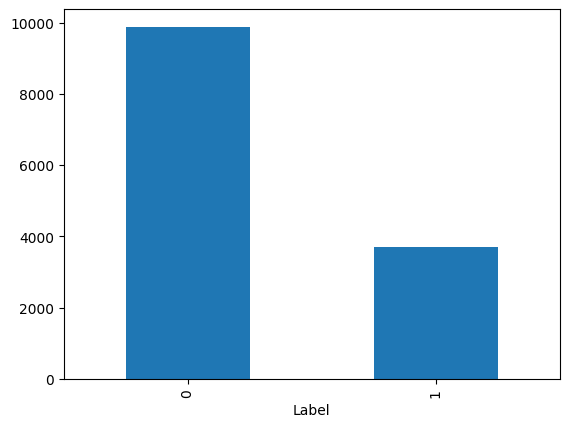

In [9]:
df.Label.value_counts().plot(kind='bar')

In [10]:
X = df['Text']
y = df['Label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [21]:


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [19]:
y_pred = sgd.predict(X_test)

In [20]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8652926021347074


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1978
           1       0.78      0.71      0.74       739

    accuracy                           0.87      2717
   macro avg       0.84      0.82      0.83      2717
weighted avg       0.86      0.87      0.86      2717

